In [1]:
import imageio
import numpy as np
import skimage.morphology
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.util import invert
import datetime
import glob

from scipy import ndimage as ndi
from skimage.morphology import disk
from skimage.segmentation import watershed
from skimage.filters import rank
from skimage.util import img_as_ubyte

from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter

from PIL import Image

In [2]:
# from scipy.spatial import ConvexHull
# image = imageio.imread('extra/Area1_Cell_00000001_bin.png')
# print(image.shape)
# image_np = np.asarray(image)
# [print(x) for x in image_np]
# from IPython.display import HTML
# HTML('<br />'.join(str(y) for y in image_np))
# im = imageio.imread('extra/Area1_Cell_00002556_bin.png')
# im_hull = ConvexHull(im)
# imshow(im_hull)

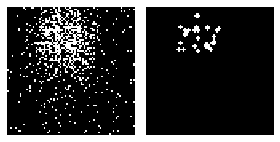

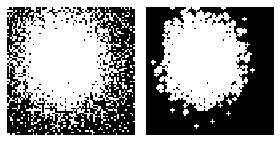

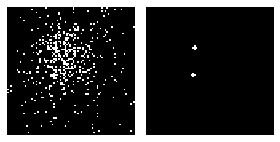

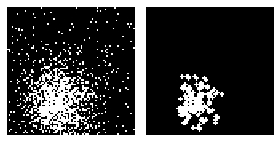

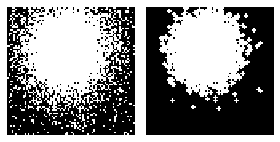

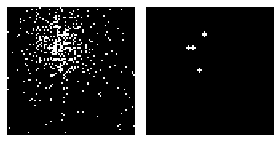

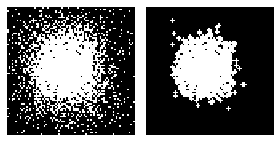

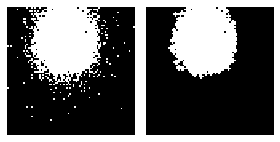

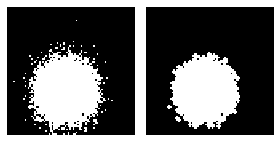

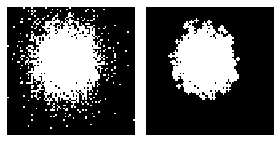

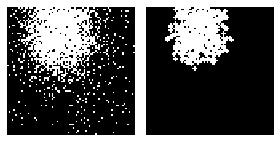

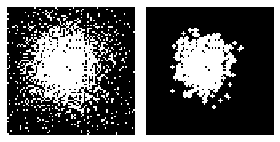

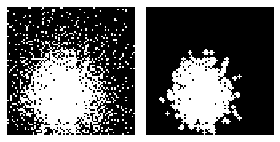

In [3]:
for imagefile in glob.glob('extra/FL_bin/*'):
    image = imageio.imread(imagefile)
    image_trans = skimage.morphology.opening(image)
    
    fig, axes = plt.subplots(1, 2, figsize = (4, 4))
    ax = axes.ravel()
    
    ax[0].imshow(image, cmap=plt.cm.gray, interpolation='nearest')
    ax[0].set_axis_off()

    ax[1].imshow(image_trans, cmap=plt.cm.gray, interpolation='nearest')
    ax[1].set_axis_off()

    plt.tight_layout()
    plt.show()

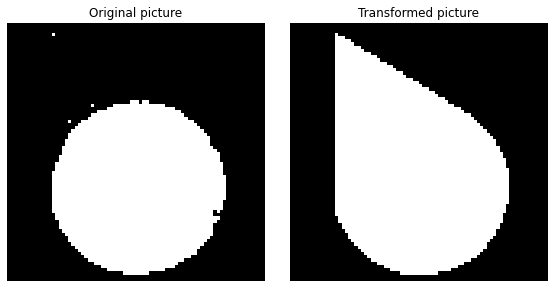

In [4]:
im = imageio.imread('extra/Area1_Cell_00002556_bin.png')
hull = skimage.morphology.convex_hull_image(im)
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].set_title('Original picture')
ax[0].imshow(im, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_axis_off()

ax[1].set_title('Transformed picture')
ax[1].imshow(hull, cmap=plt.cm.gray, interpolation='nearest')
ax[1].set_axis_off()

plt.tight_layout()
plt.show()

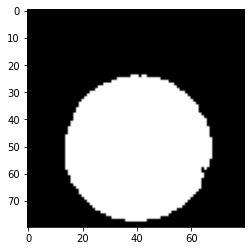

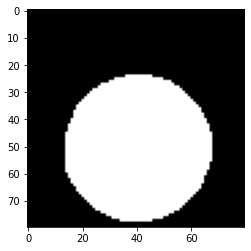

In [5]:
im = imageio.imread('extra/Area1_Cell_00002556_bin.png')
im_trans = skimage.morphology.opening(im)
plt.imshow(im_trans, cmap = plt.cm.gray)
plt.show()

hull_trans = skimage.morphology.convex_hull_image(im_trans)
plt.imshow(hull_trans, cmap = plt.cm.gray)
plt.show()

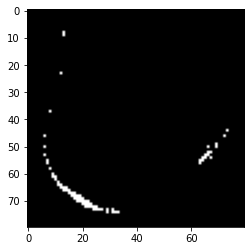

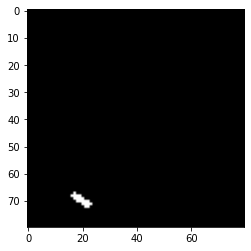

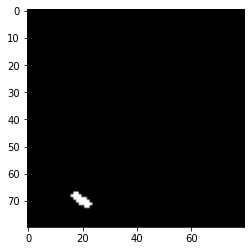

In [6]:
im = imageio.imread('extra/Area1_Cell_00000001_bin.png')
plt.imshow(im, cmap = plt.cm.gray)
plt.show()

im_trans = skimage.morphology.opening(im)
plt.imshow(im_trans, cmap = plt.cm.gray)
plt.show()

hull_trans = skimage.morphology.convex_hull_image(im_trans)
plt.imshow(hull_trans, cmap = plt.cm.gray)
plt.show()

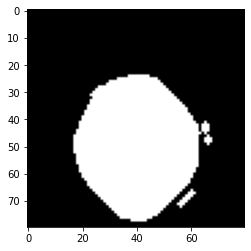

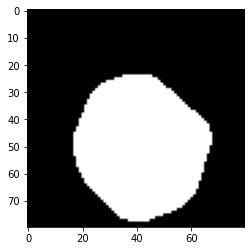

In [7]:
im = imageio.imread('extra/Area1_Cell_00002578_bin.png')
im_trans = skimage.morphology.opening(im)
plt.imshow(im_trans, cmap = plt.cm.gray)
plt.show()

hull_trans = skimage.morphology.convex_hull_image(im_trans)
plt.imshow(hull_trans, cmap = plt.cm.gray)
plt.show()

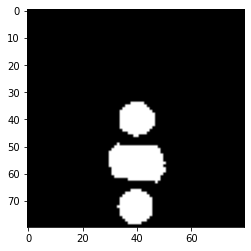

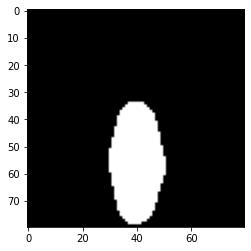

In [8]:
im = imageio.imread('extra/Area1_Cell_00000013_bin.png')
im_trans = skimage.morphology.opening(im)
plt.imshow(im_trans, cmap = plt.cm.gray)
plt.show()

hull_trans = skimage.morphology.convex_hull_image(im_trans)
plt.imshow(hull_trans, cmap = plt.cm.gray)
plt.show()

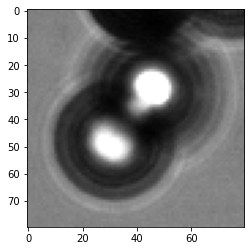

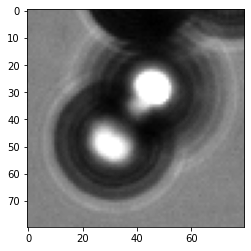

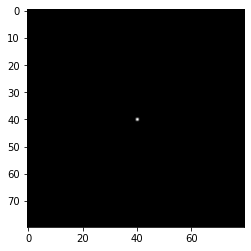

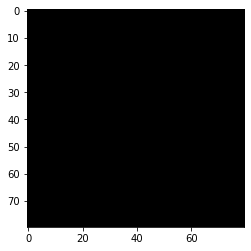

In [9]:
im = imageio.imread('extra/Area1_Cell_00000001.png')
plt.imshow(im, cmap = plt.cm.gray)
plt.show()

im_new = im.copy()
im_new[40][40] += 10
plt.imshow(im_new, cmap = plt.cm.gray)
plt.show()

diff = im_new - im
plt.imshow(diff, cmap = plt.cm.gray)
plt.show()

diff_trans = skimage.morphology.opening(diff)
plt.imshow(diff_trans, cmap = plt.cm.gray)
plt.show()

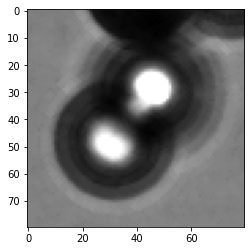

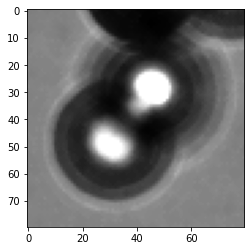

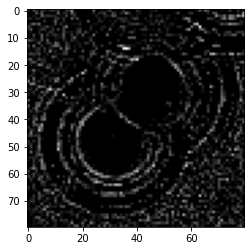

In [10]:
im_trans = skimage.morphology.opening(im)
plt.imshow(im_trans, cmap = plt.cm.gray)
plt.show()

im_trans = skimage.morphology.closing(im)
plt.imshow(im_trans, cmap = plt.cm.gray)
plt.show()

plt.imshow(im_trans - im, cmap = plt.cm.gray)
plt.show()

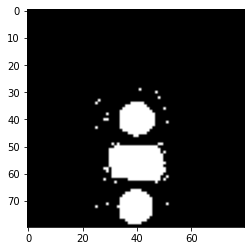

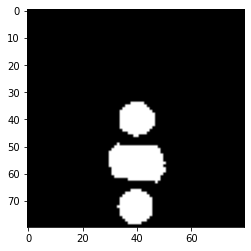

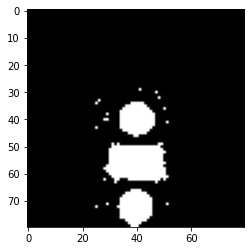

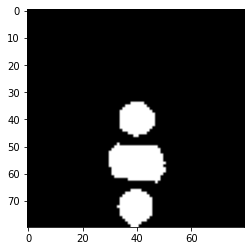

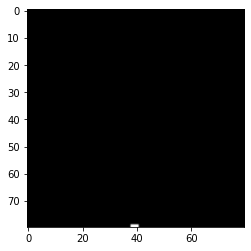

In [11]:
im = imageio.imread('extra/Area1_Cell_00000013_bin.png')
plt.imshow(im, cmap = plt.cm.gray)
plt.show()

im_open = skimage.morphology.opening(im)
plt.imshow(im_open, cmap = plt.cm.gray)
plt.show()

im_close = skimage.morphology.closing(im)
plt.imshow(im_close, cmap = plt.cm.gray)
plt.show()

im_mix = skimage.morphology.closing(im_open)
plt.imshow(im_mix, cmap = plt.cm.gray)
plt.show()

plt.imshow(abs(im_mix - im_open), cmap = plt.cm.gray)
plt.show()

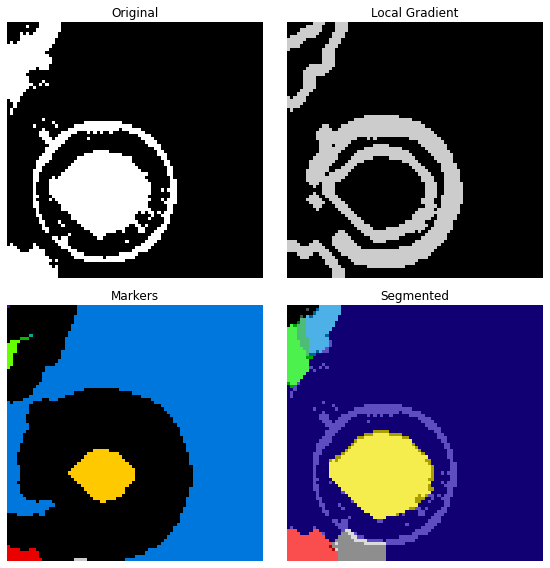

0:00:00.392460


In [12]:
begin_time = datetime.datetime.now()

im = imageio.imread('extra/Area1_Cell_00000004_bin.png')
image = img_as_ubyte(im)

# denoise image
denoised = rank.median(image, disk(2))

# find continuous region (low gradient -
# where less than 10 for this image) --> markers
# disk(5) is used here to get a more smooth image
markers = rank.gradient(denoised, disk(5)) < 10
markers = ndi.label(markers)[0]

# local gradient (disk(2) is used to keep edges thin)
gradient = rank.gradient(denoised, disk(2))

# process the watershed
labels = watershed(gradient, markers)

# display results
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8),
                         sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title("Original")

ax[1].imshow(gradient, cmap=plt.cm.nipy_spectral)
ax[1].set_title("Local Gradient")

ax[2].imshow(markers, cmap=plt.cm.nipy_spectral)
ax[2].set_title("Markers")

ax[3].imshow(image, cmap=plt.cm.gray)
ax[3].imshow(labels, cmap=plt.cm.nipy_spectral, alpha=.7)
ax[3].set_title("Segmented")

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()
print(datetime.datetime.now() - begin_time)

0:00:00.011033


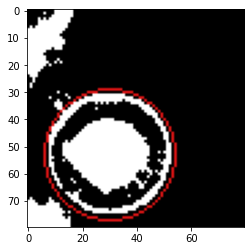

In [13]:
# https://scikit-image.org/docs/dev/auto_examples/edges/plot_circular_elliptical_hough_transform.html

im = imageio.imread('extra/Area1_Cell_00000004_bin.png')

begin_time = datetime.datetime.now()


# Load picture and detect edges
# image = img_as_ubyte(im)
edges = canny(image, sigma=3, low_threshold=10, high_threshold=50)

# print (edges)
# Detect two radii
hough_radii = np.arange(20, 25, 2)
hough_res = hough_circle(edges, hough_radii)

# Select the most prominent 3 circles
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=1)

print(datetime.datetime.now() - begin_time)

# Draw them
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
image = color.gray2rgb(image)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius,
                                    shape=image.shape)
    image[circy, circx] = (220, 20, 20)

ax.imshow(image, cmap=plt.cm.gray)
plt.show()

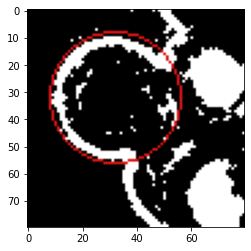

In [14]:
# Load picture and detect edges
im = imageio.imread("extra/Area1_Cell_00000120_bin.png")
image = img_as_ubyte(im)
edges = canny(image, sigma=3, low_threshold=10, high_threshold=50)


# Detect two radii
hough_radii = np.arange(20, 35, 2)
hough_res = hough_circle(edges, hough_radii)

# Select the most prominent 3 circles
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=1)

# Draw them
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
image = color.gray2rgb(image)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius,
                                    shape=image.shape)
    image[circy, circx] = (220, 20, 20)

ax.imshow(image, cmap=plt.cm.gray)
plt.show()

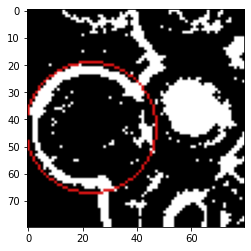

In [15]:
# Load picture and detect edges
im = imageio.imread("extra/Area1_Cell_00000115_bin.png")
image = img_as_ubyte(im)
edges = canny(image, sigma=3, low_threshold=10, high_threshold=50)


# Detect two radii
hough_radii = np.arange(20, 35, 2)
hough_res = hough_circle(edges, hough_radii)

# Select the most prominent 3 circles
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=1)

# Draw them
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
image = color.gray2rgb(image)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius,
                                    shape=image.shape)
    image[circy, circx] = (220, 20, 20)

ax.imshow(image, cmap=plt.cm.gray)
plt.show()

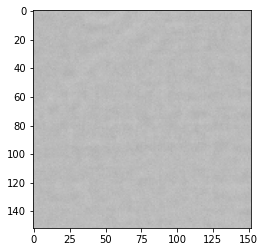

(152, 152, 3)


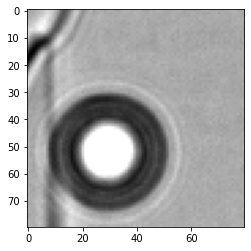

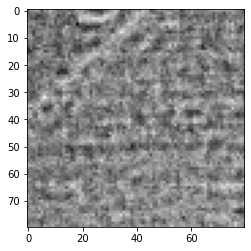

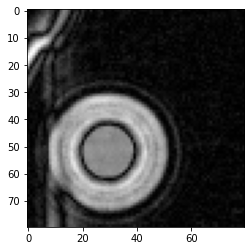

In [16]:
im1 = imageio.imread("extra/Area1_Cell_00000004.png")
(H, W) = im1.shape
im2 = imageio.imread("extra/Master.png")

plt.imshow(im2, cmap = plt.cm.gray)
plt.show()
print(im2.shape)

# plt.imshow(im2[:,:,0], cmap = plt.cm.gray)
# plt.show()
# print(im2.shape)

# plt.imshow(im2[:,:,1], cmap = plt.cm.gray)
# plt.show()
# print(im2.shape)

# plt.imshow(im2[:,:,2], cmap = plt.cm.gray)
# plt.show()
# print(im2.shape)

im2 = skimage.color.rgb2gray(im2)
im2 = skimage.transform.resize(im2, im1.shape)
diff = skimage.util.compare_images(im1, im2)

plt.imshow(im1, cmap = plt.cm.gray)
plt.show()

plt.imshow(im2, cmap = plt.cm.gray)
plt.show()

plt.imshow(diff, cmap = plt.cm.gray)
plt.show()

[  70.72659397 1439.64383097]
1441.360415407874


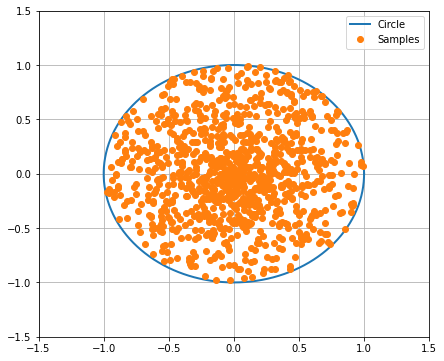

In [17]:
im = imageio.imread('extra/Area1_Cell_00000001_bin.png')
# x_array = []
# y_array = []

# for id_x, row in enumerate(im):
#     for id_y, val in enumerate(row):
#         if (val != 0):
#             x_array.append(id_x)
#             y_array.append(id_y)

num_samples = 1000

# make a simple unit circle 
theta = np.linspace(0, 2*np.pi, num_samples)
a, b = 1 * np.cos(theta), 1 * np.sin(theta)

# generate the points
# theta = np.random.rand((num_samples)) * (2 * np.pi)
r = np.random.rand((num_samples))
x_array, y_array = r * np.cos(theta), r * np.sin(theta)
   
    
temp1 = []
temp2 = []
temp3 = []
arr1 = []
# print(x_array)
# print(y_array)
x_mean = np.mean(x_array)
y_mean = np.mean(y_array)
# print(x_mean, y_mean)
# print(*(x_array - x_mean))
# print(*(x_array * (x_array - x_mean)))
# temp = 0
# for (x) in (x_array * (x_array - x_mean)):
#     temp = temp + x
# print(temp)
# print(np.sum(x_array * (x_array - x_mean)))
temp1.append(np.sum(x_array * (x_array - x_mean)))
temp1.append(np.sum(y_array * (x_array - x_mean)))
temp2.append(np.sum(y_array * (x_array - x_mean)))
temp2.append(np.sum(y_array * (y_array - y_mean)))
# print(temp1, temp2)
temp1 = np.array(temp1)
temp2 = np.array(temp2)
arr1.append(temp1)
arr1.append(temp2)
arr1 = np.array(arr1)
# print(arr1)

square = np.square(x_array) + np.square(y_array)
temp3.append(np.sum(square * (x_array - x_mean) * 0.5))
temp3.append(np.sum(square * (y_array - y_mean) * 0.5))
temp3 = np.array(temp3)
# print(temp3)
# res = []
# temp = []
# for idx, row in enumerate (arr1):
#     temp = 0
#     for idy, val in enumerate (row):
#         temp += val * temp3[idy]
#     res.append(temp)
#     temp = []
# print(arr1.dot(temp3))
res = arr1.dot(temp3)
print(res)
print(np.sqrt((np.sum(np.square(x_array - res[0])) + np.sum(np.square(y_array - res[1]))) / len(x_array)))

plt.figure(figsize=(7,6))
plt.plot(a, b, linestyle='-', linewidth=2, label='Circle')
plt.plot(x_array, y_array, marker='o', linestyle=' ', label='Samples')
plt.ylim([-1.5,1.5])
plt.xlim([-1.5,1.5])
plt.grid()
plt.legend(loc='upper right')
plt.show(block=True)

80x80


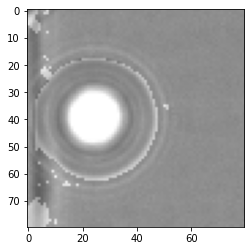

80x80


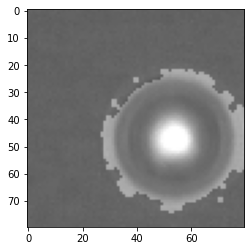

80x80


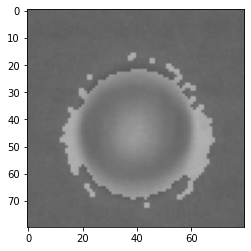

60x100


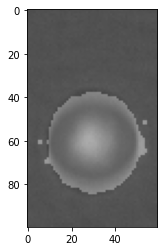

80x100


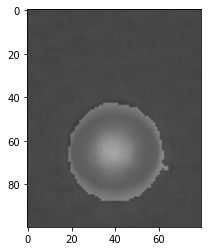

100x100


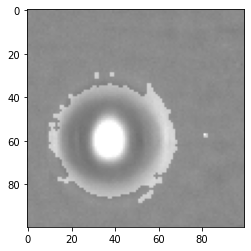

In [18]:
image_list = ["020", "006", "052", "016", "007", "008"]
# base_dir = r"C:/Users/juntingma/Documents/G_Drive/'My Drive'/experiment_results/2020-08-25_first_experiment/20200825142817/Aria1/"
base_dir = "extra/"

for item in image_list:
    background = Image.open(base_dir + "Area1_Cell_00000" + item + "_bin.png")
    overlay = Image.open(base_dir + "Area1_Cell_00000" + item + ".png")
    
    background = background.convert("RGBA")
    overlay = overlay.convert("RGBA")
    
    new_image = Image.blend(background, overlay, 0.75)
    width, height = new_image.size
    print(str(width) + "x" + str(height))
    
    plt.imshow(new_image)
    plt.show()


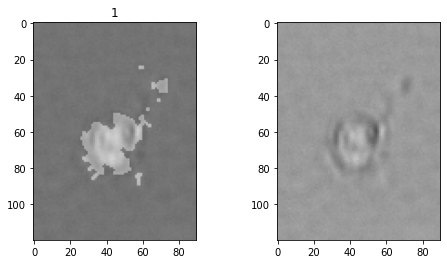

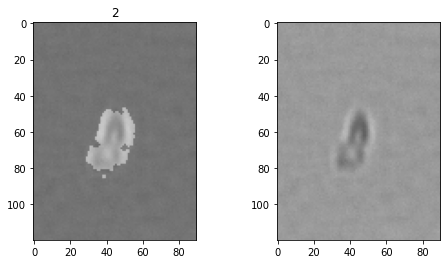

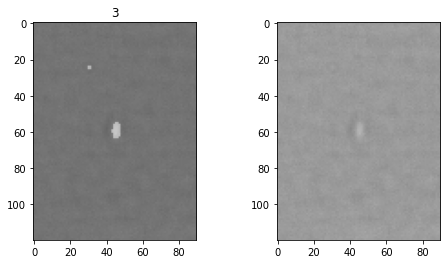

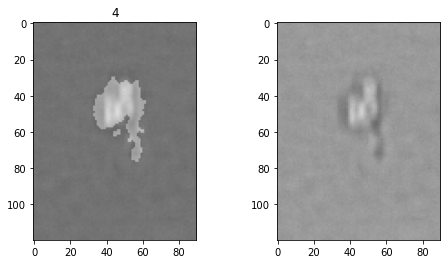

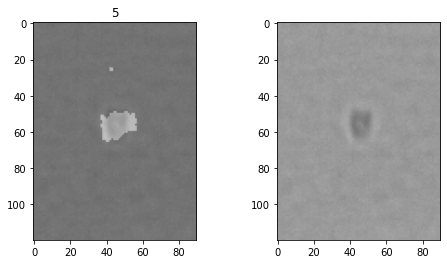

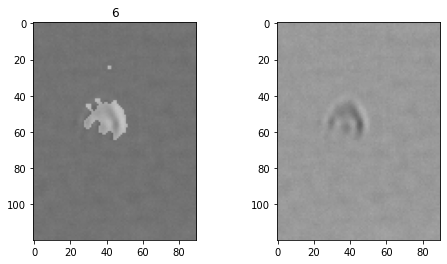

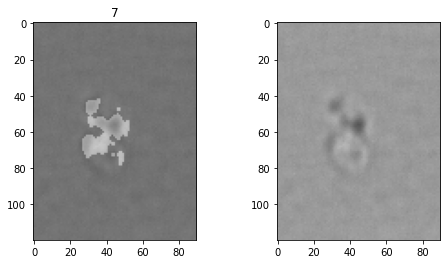

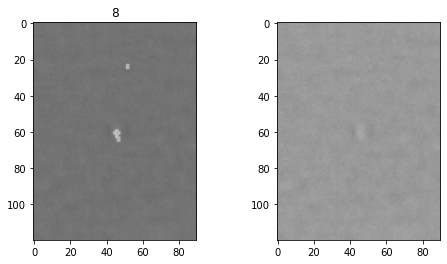

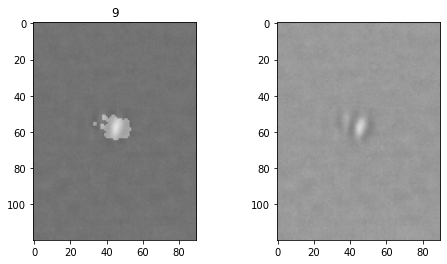

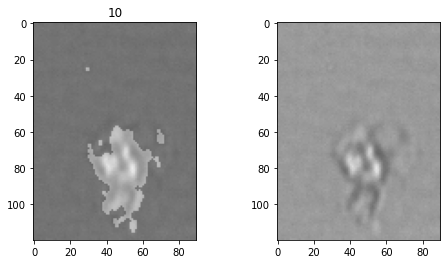

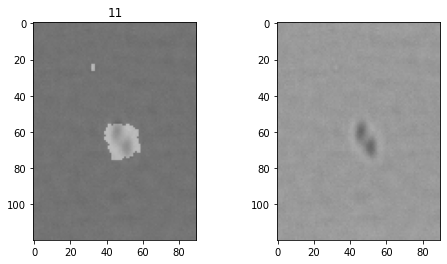

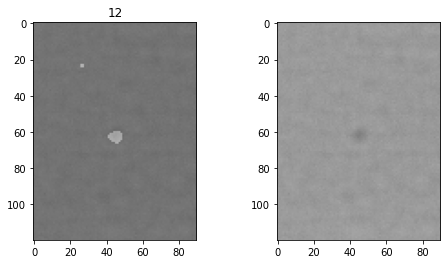

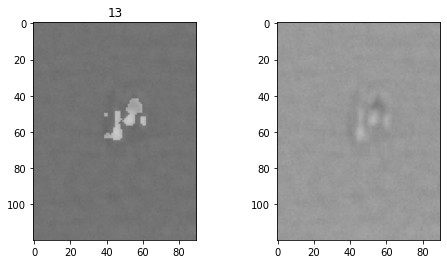

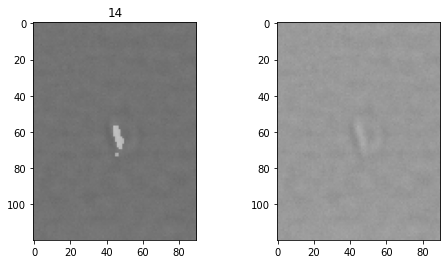

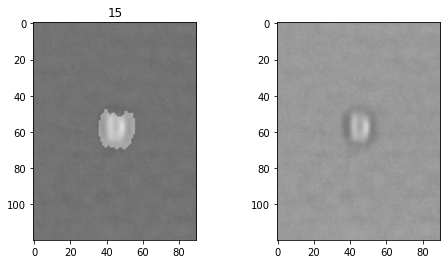

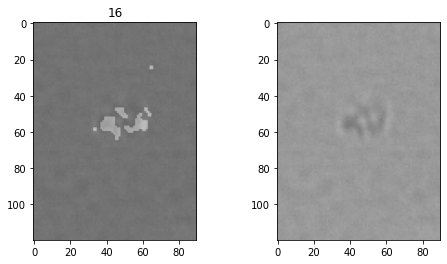

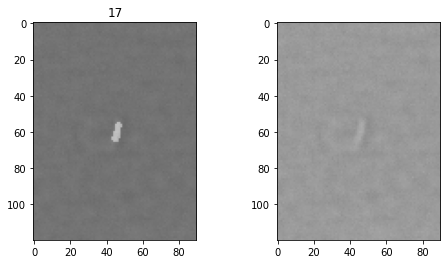

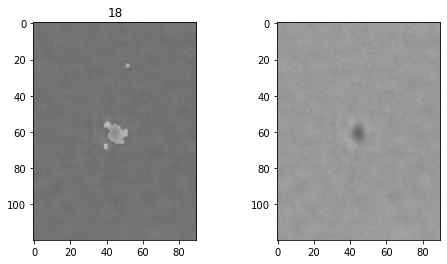

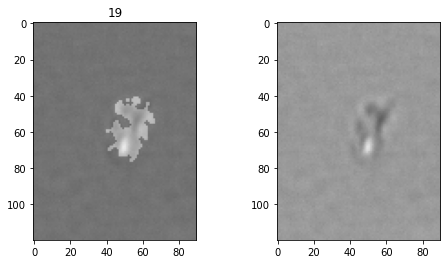

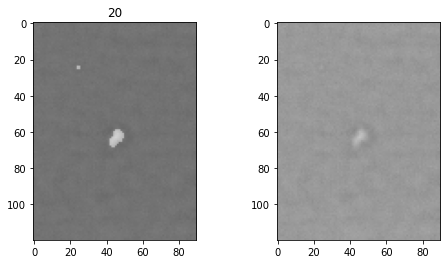

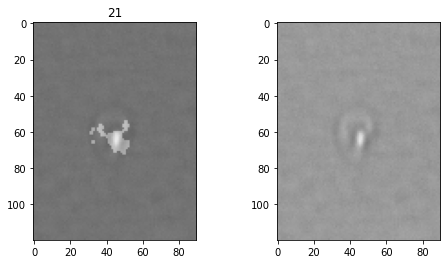

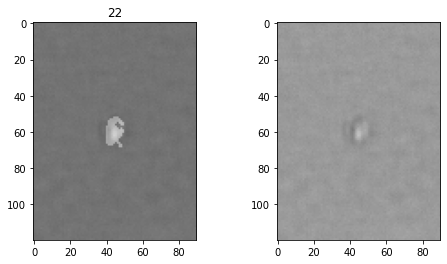

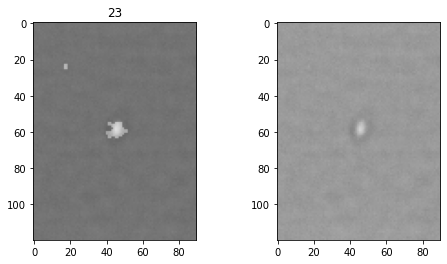

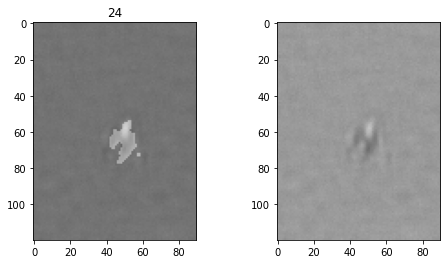

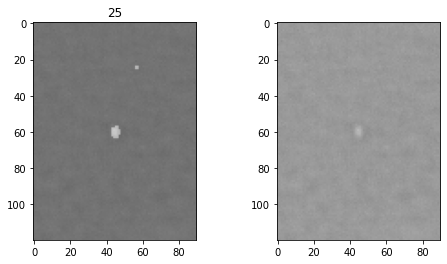

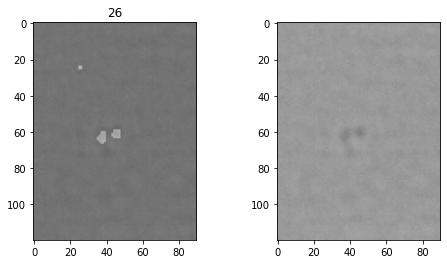

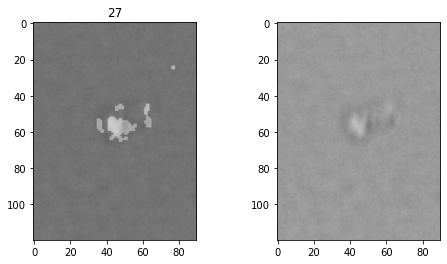

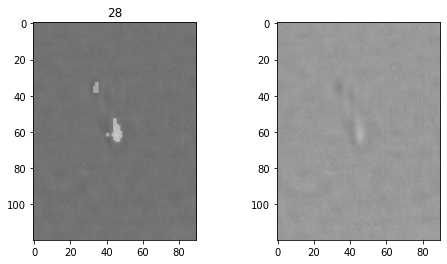

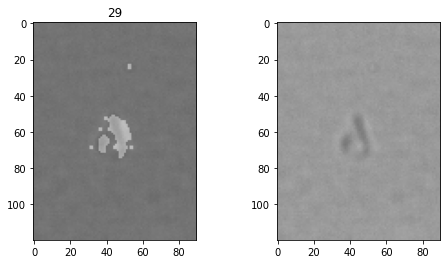

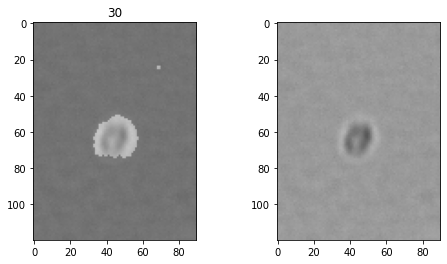

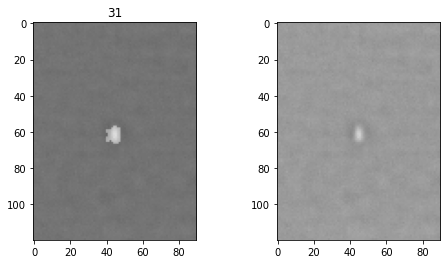

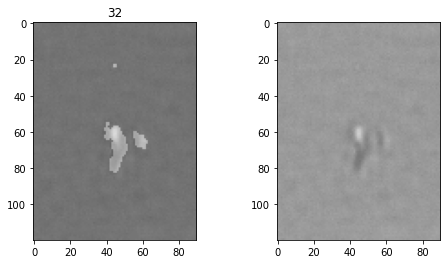

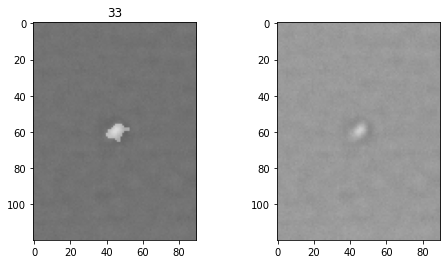

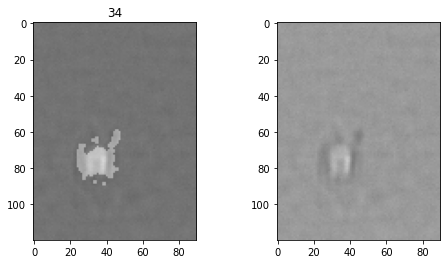

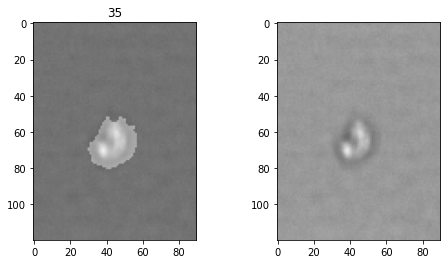

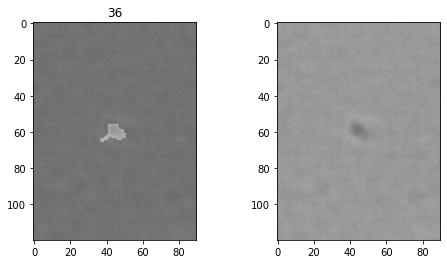

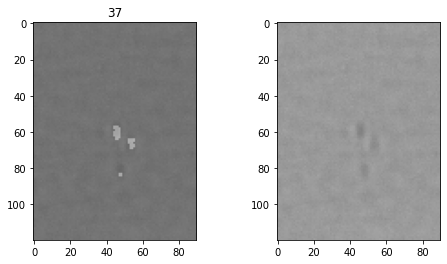

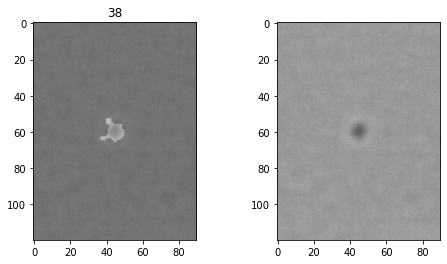

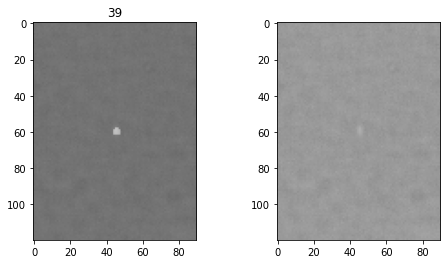

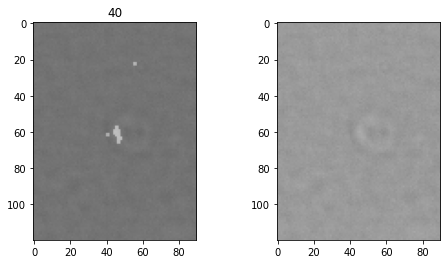

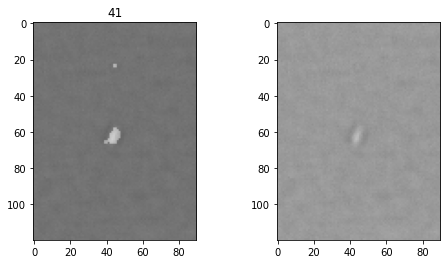

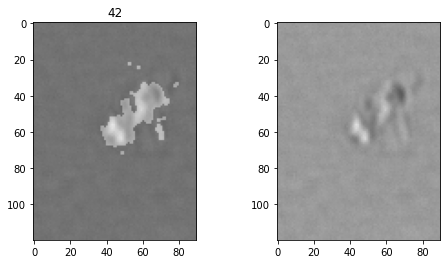

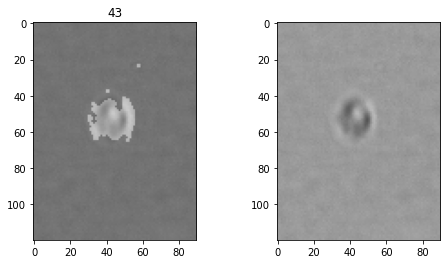

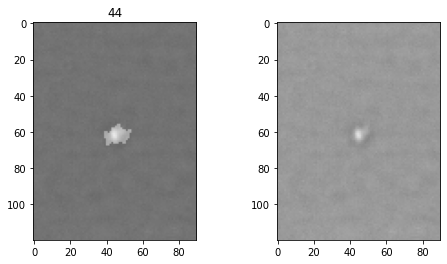

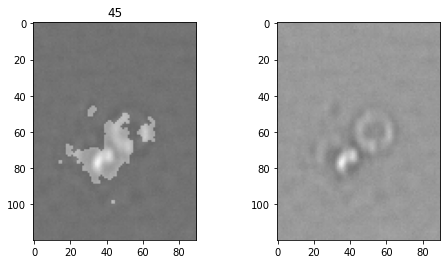

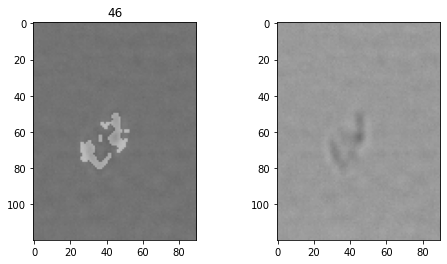

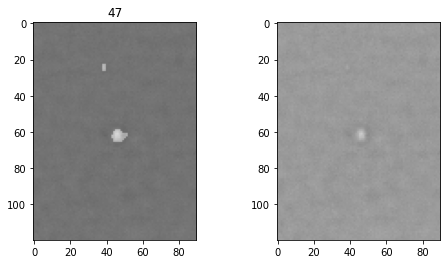

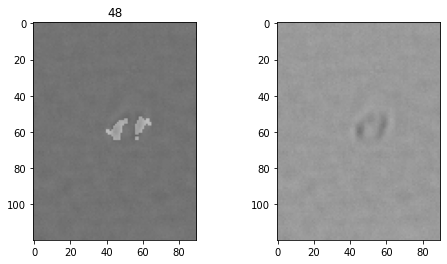

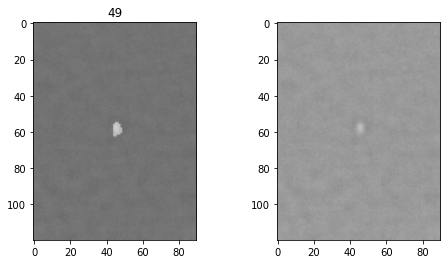

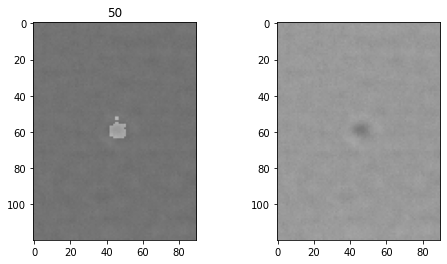

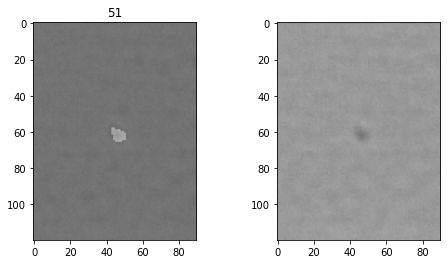

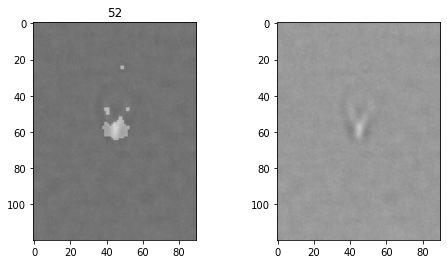

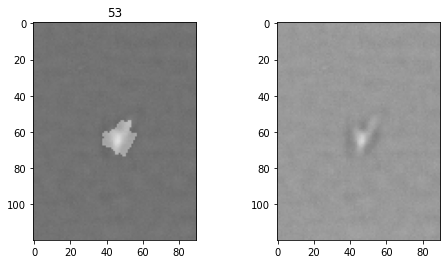

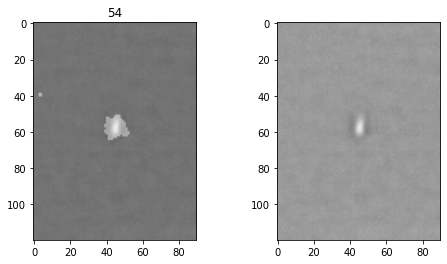

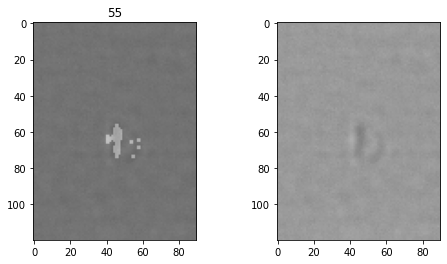

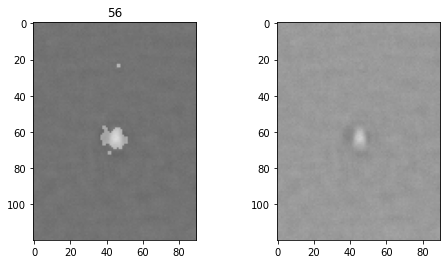

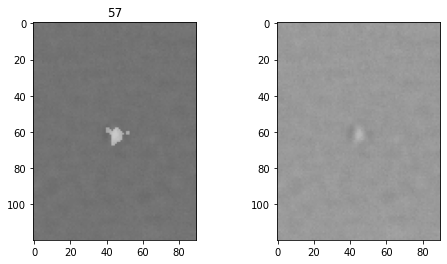

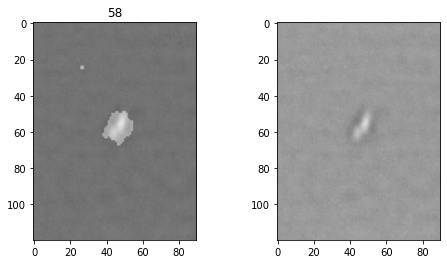

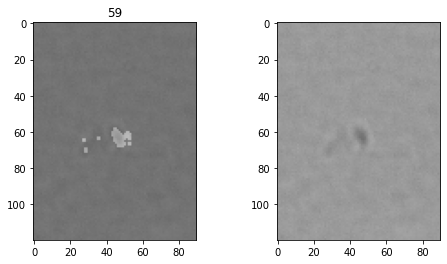

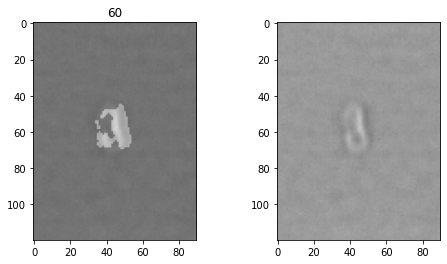

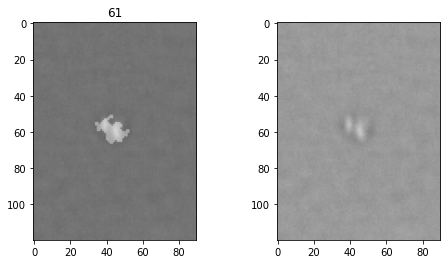

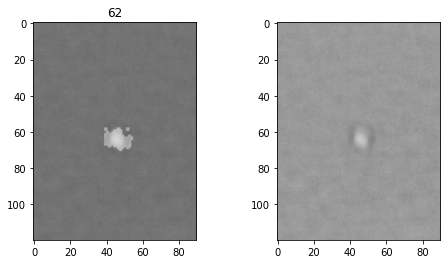

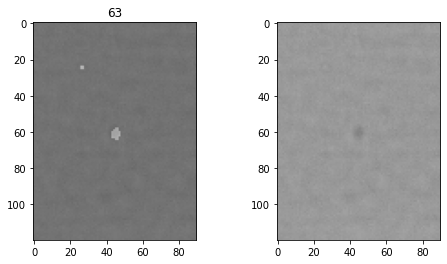

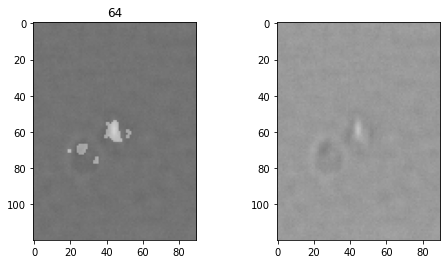

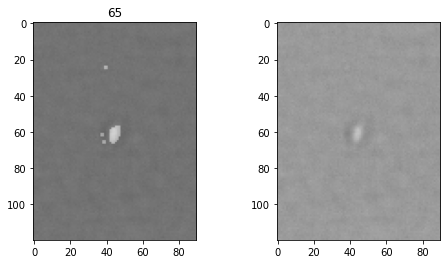

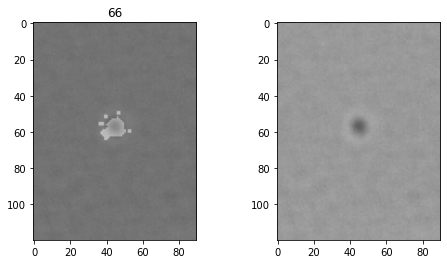

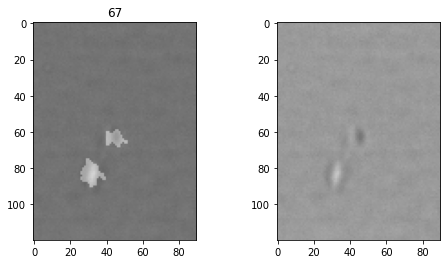

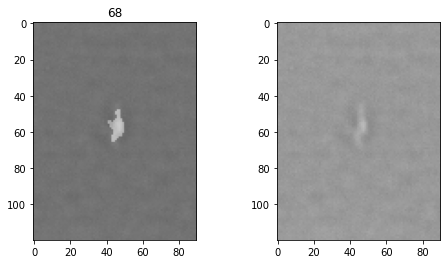

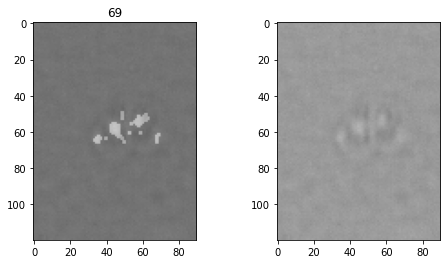

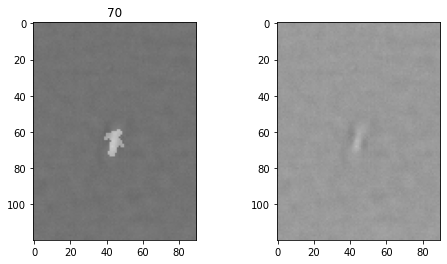

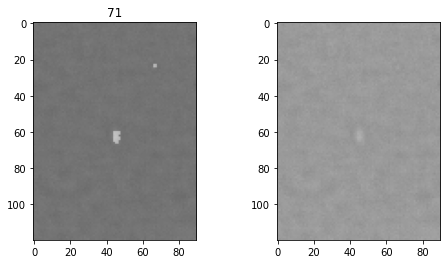

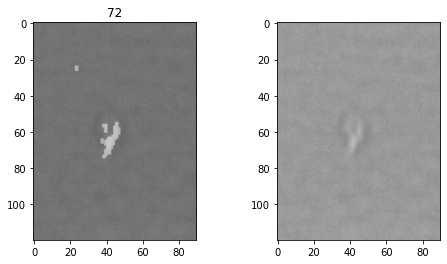

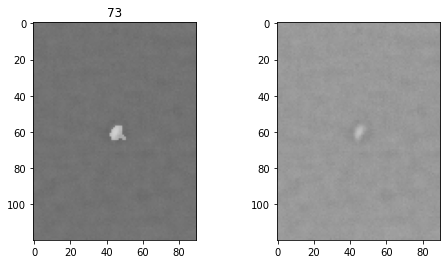

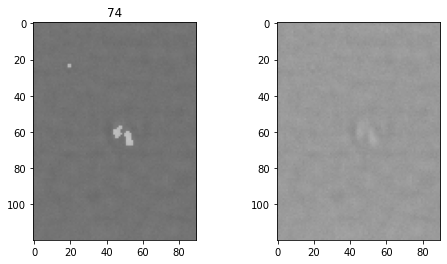

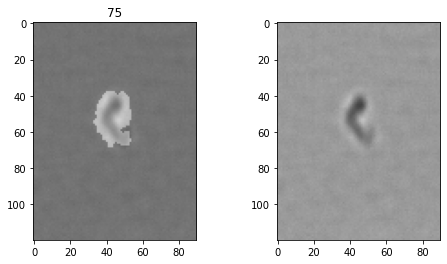

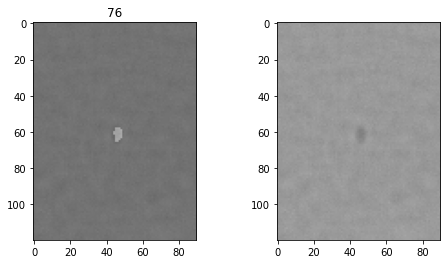

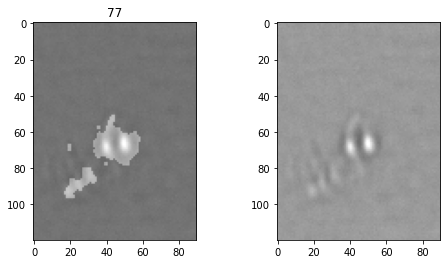

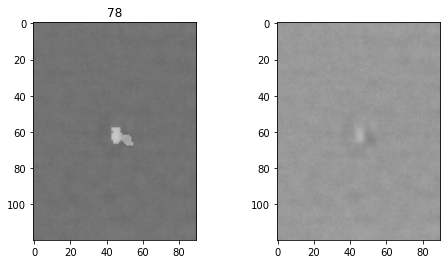

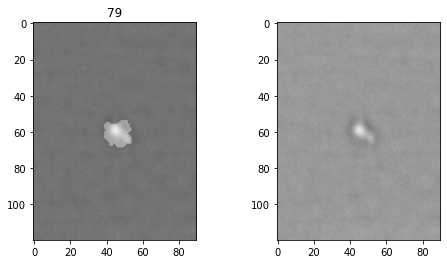

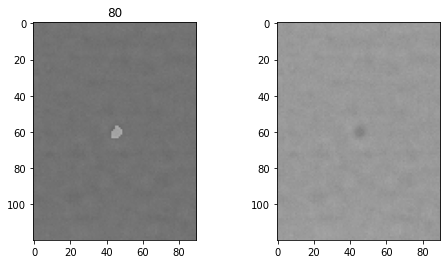

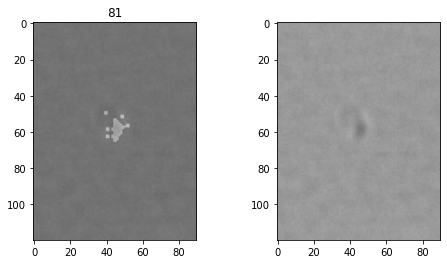

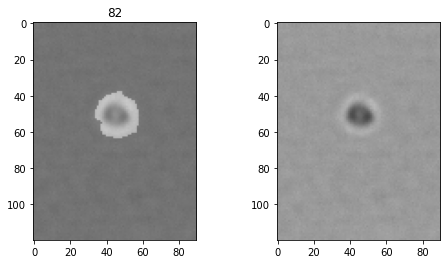

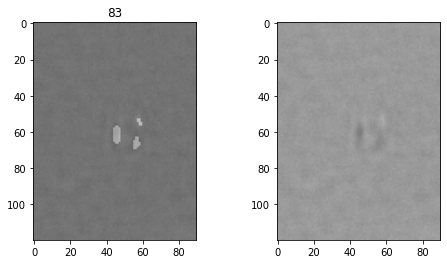

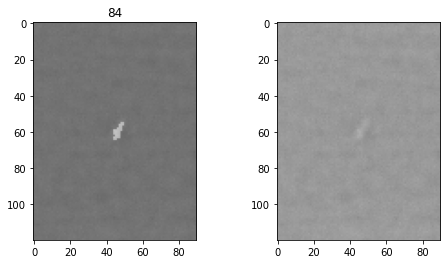

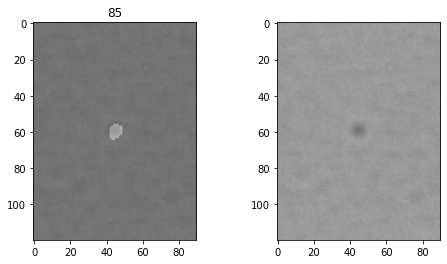

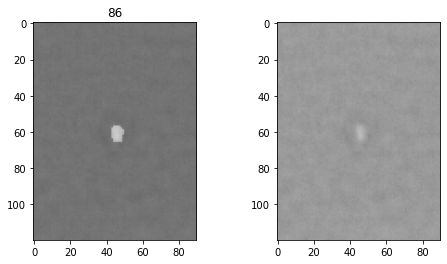

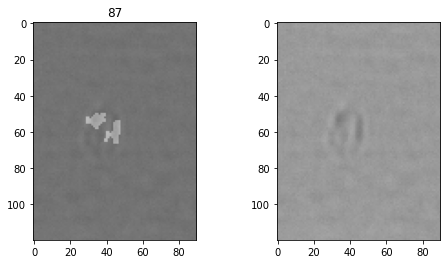

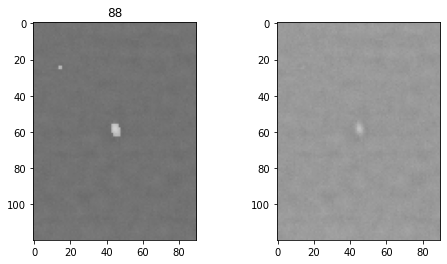

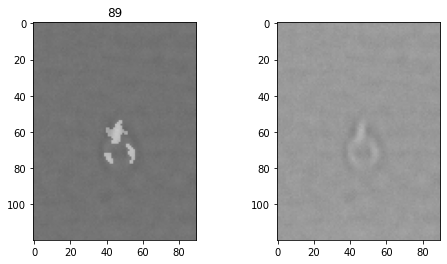

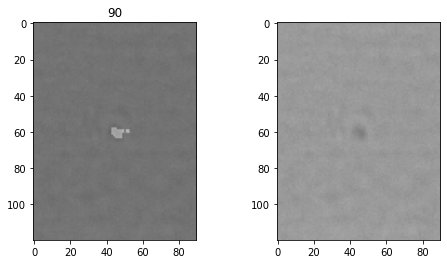

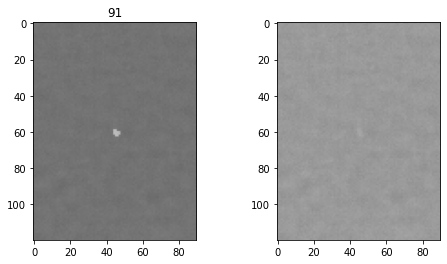

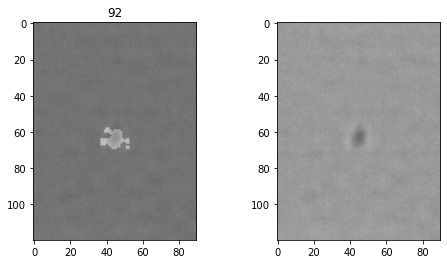

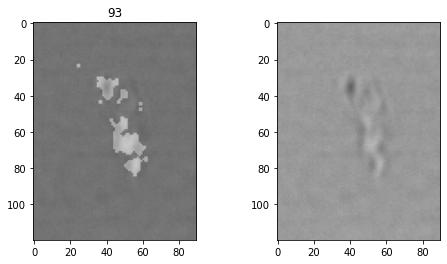

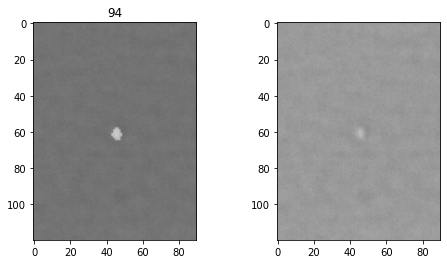

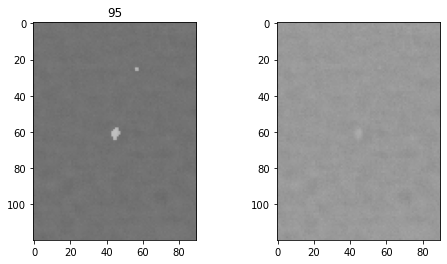

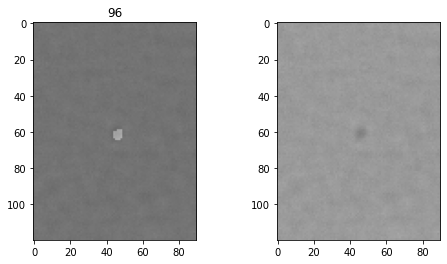

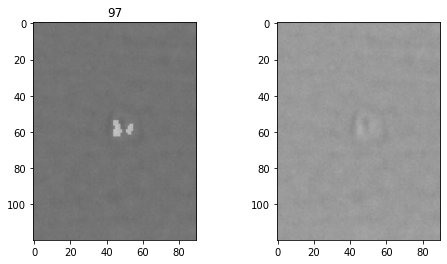

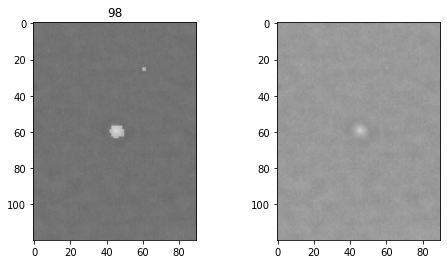

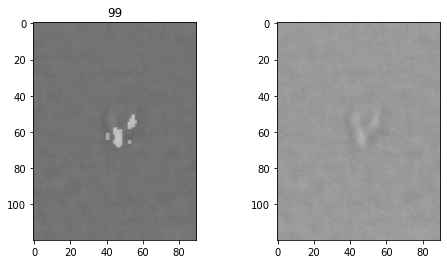

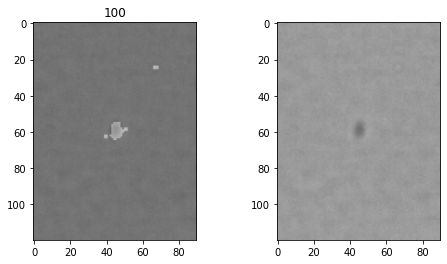

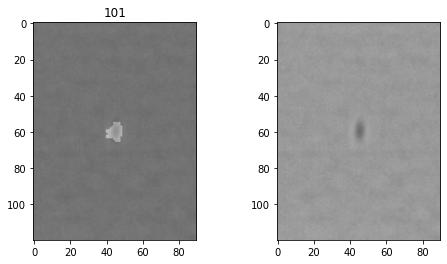

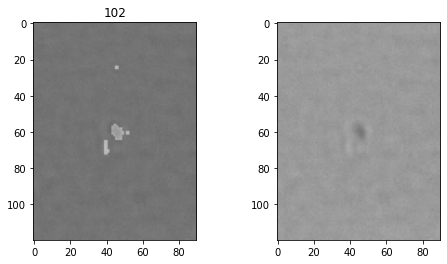

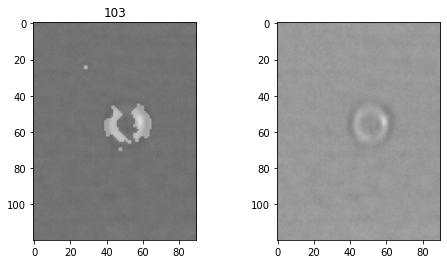

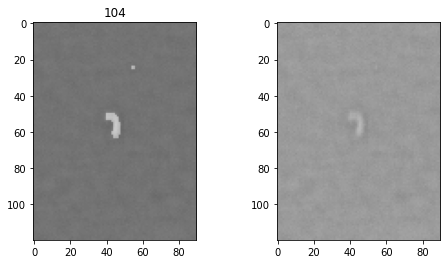

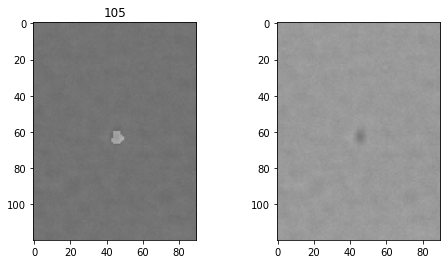

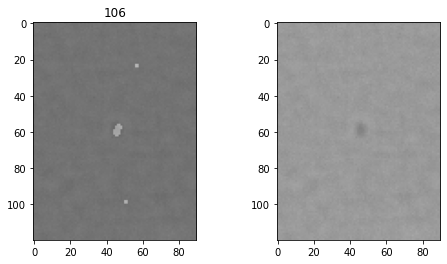

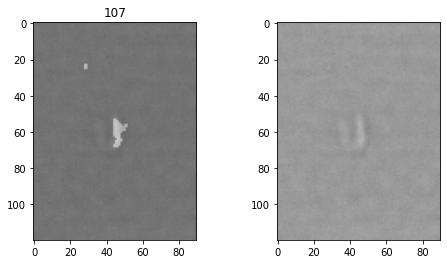

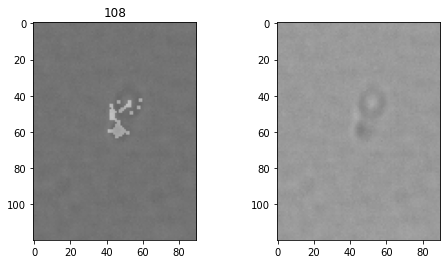

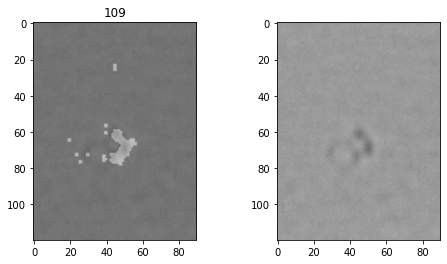

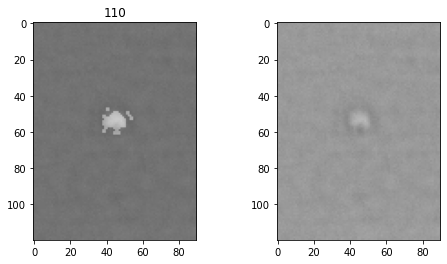

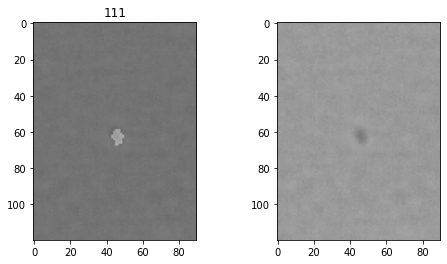

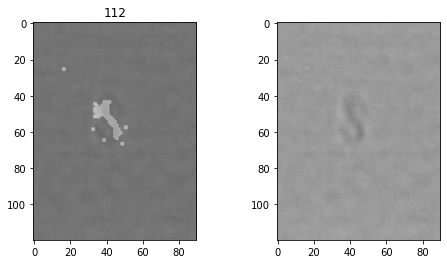

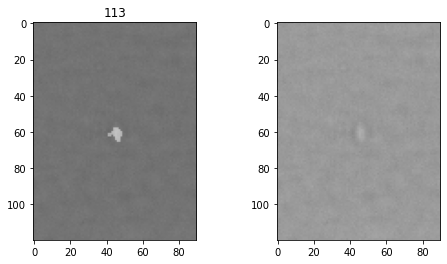

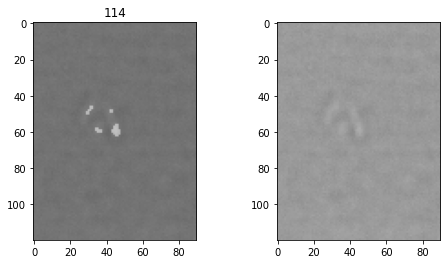

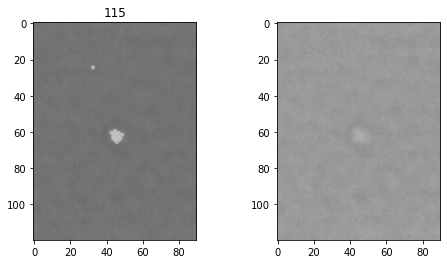

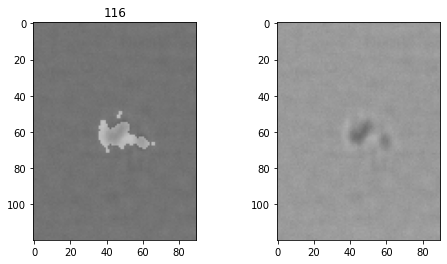

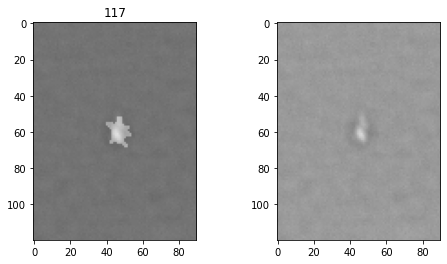

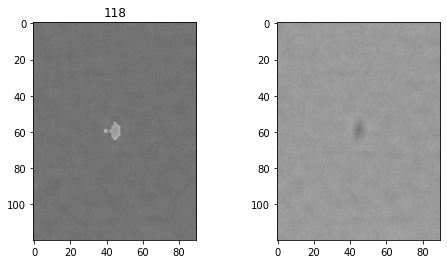

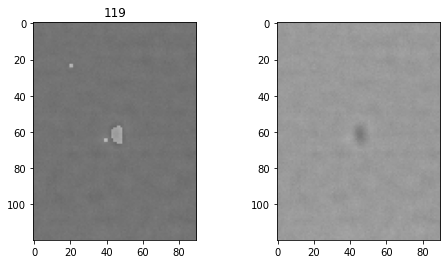

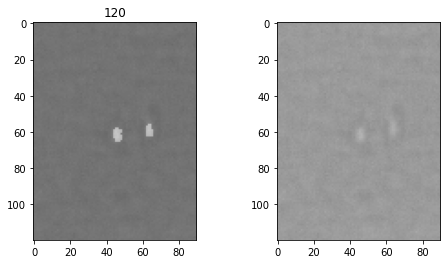

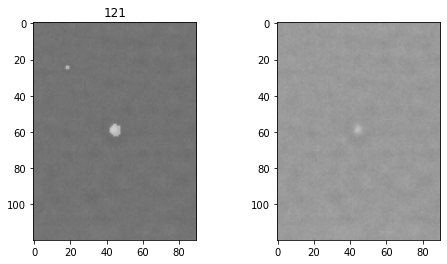

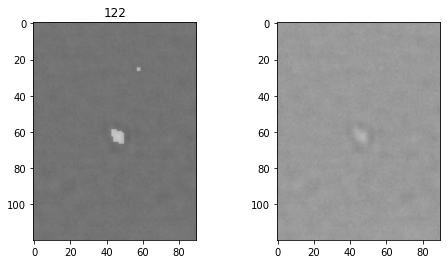

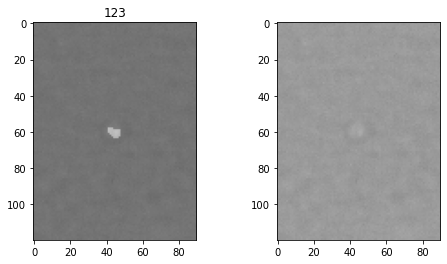

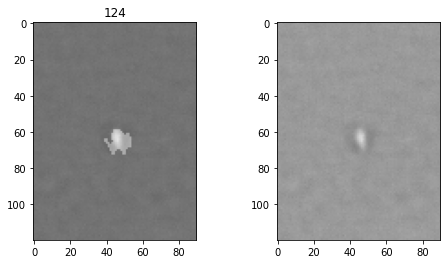

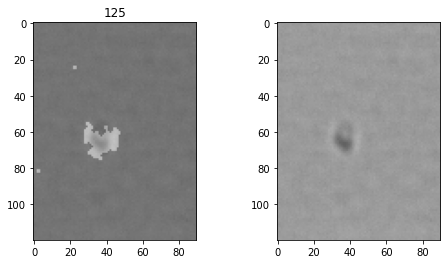

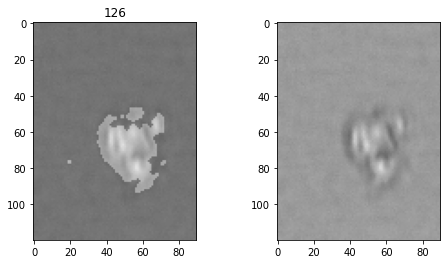

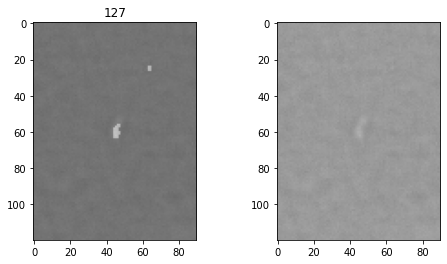

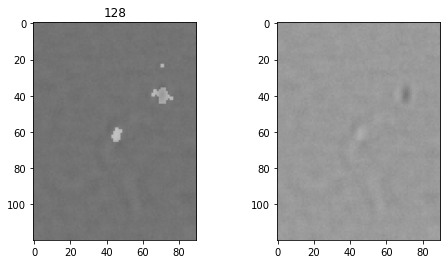

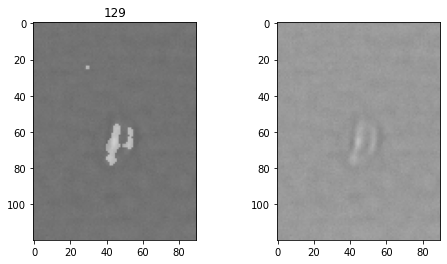

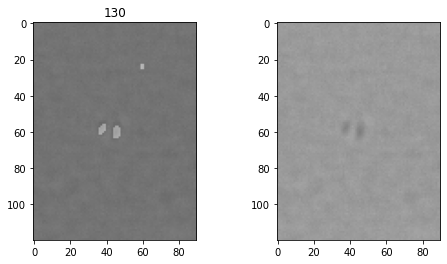

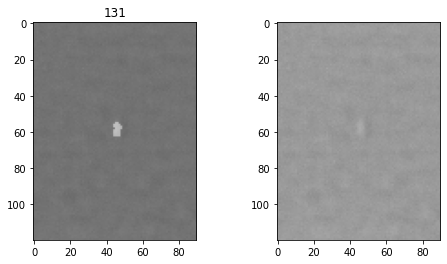

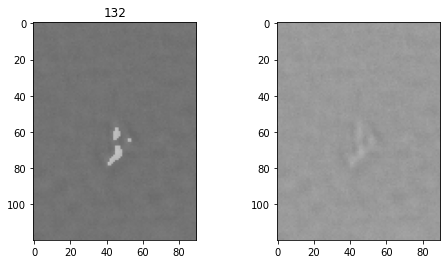

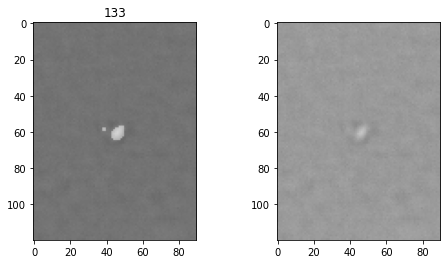

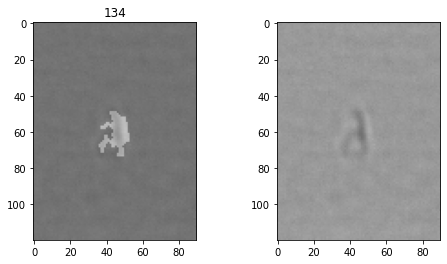

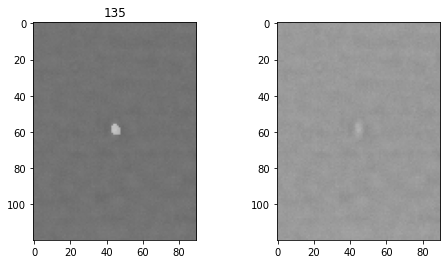

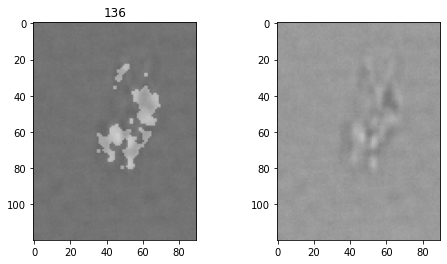

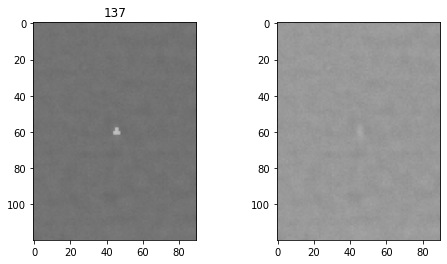

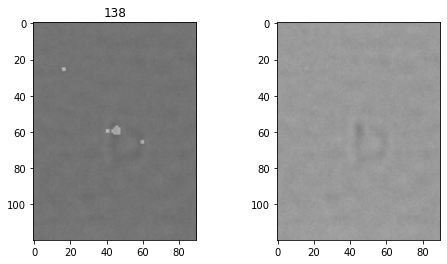

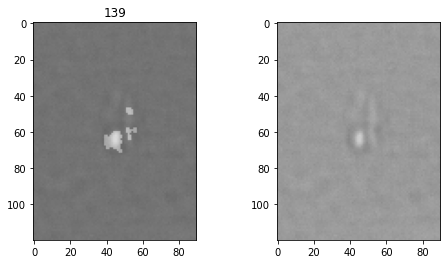

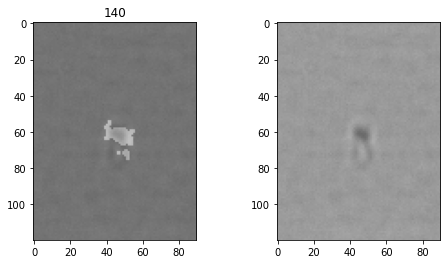

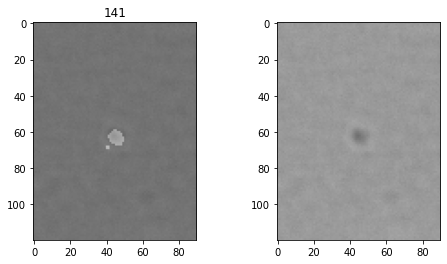

In [30]:
base_dir = "extra/20201005112923/Aria1/"

for item in range (1, 142):
    background = Image.open(base_dir + "Area1_Cell_00000" + str(item).zfill(3) + "_bin.png")
    overlay = Image.open(base_dir + "Area1_Cell_00000" + str(item).zfill(3) + ".png")
    
    background = background.convert("RGBA")
    overlay = overlay.convert("RGBA")
    
    new_image = Image.blend(background, overlay, 0.75)
    
    fig, axes = plt.subplots(1, 2, figsize = (8, 4))
    ax = axes.ravel()
    
    ax[0].set_title(item)
    ax[0].imshow(new_image)
    ax[1].imshow(overlay)
    
    plt.show()
